In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df.head(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df['Email No.'].is_unique

True

In [5]:
df = df.drop(columns=['Email No.'])

In [6]:
df['Prediction'].value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [160]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD

In [302]:
from sklearn.manifold import TSNE

In [195]:
def create_acc_df(classifies, sp_ls, pcs, n_components, rs_ls):
    
    n_results_acc = {}
    n_results_rep = {}

    for cl_name, cl_func in classifies.items():
        for p in pcs:
            for sp in sp_ls:
                for n in n_components:
                    for rs in rs_ls:
                        acc, rep = sc_pca_class_test(X, y, StandardScaler(), p, n, 0.2, cl_func, sp, rs) 
                        key_name = cl_name + '_' + sp + '_' + str(p) + '_' + str(n) + '_' + str(rs)
                        n_results_acc[key_name] = acc
                        n_results_rep[key_name] = rep
                        
    acc = pd.DataFrame.from_dict(n_results_acc, orient='index')
    acc.reset_index(inplace=True)
    acc.rename(columns={'index': 'model', 0 : 'accuracy'}, inplace=True)

    split_columns = acc['model'].str.split('_', expand=True)

    split_columns.columns = ['model_name', 'split_method', 'pca', 'n_components', 'random_state']

    acc2 = acc.join(split_columns)
    acc2.drop(columns=['model'], inplace=True) 
    

    
    return acc2.sort_values(by='accuracy', ascending=False), rep

In [225]:
parse_dc = {}

for k in n_results_rep.keys():
    n_results_rep[k].loc[['0','1'], ['precision', 'recall', 'f1-score']]
    
    
    ['accuracy', 'weighted avg'], ['precision', 'recall', 'f1-score']

,precision,recall,f1-score
0,0.981132,0.983784,0.982456
1,0.959044,0.952542,0.955782


In [ ]:
acc = pd.DataFrame.from_dict(n_results_rep, orient='index')
acc.reset_index(inplace=True)
acc.rename(columns={'index': 'model', 0 : 'accuracy'}, inplace=True)

split_columns = acc['model'].str.split('_', expand=True)

split_columns.columns = ['model_name', 'split_method', 'pca', 'n_components', 'random_state']

acc2 = acc.join(split_columns)
acc2.drop(columns=['model'], inplace=True) 



return acc2.sort_values(by='accuracy', ascending=False)

In [255]:
len(n_results_rep)

24

In [ ]:
pca_results_rep

In [253]:
rows = []

for model,df in n_results_rep.items():
    row = df.loc[['weighted avg'], ['precision', 'recall', 'f1-score']].T.to_dict()
    row = row['weighted avg']
    row['model'] = model
    rows.append(row)

result_df = pd.DataFrame(rows)

result_df = result_df[['model', 'precision', 'recall', 'f1-score']]

In [261]:
rows = []

for model,df in pca_results_rep.items():
    row = df.loc[['weighted avg'], ['precision', 'recall', 'f1-score']].T.to_dict()
    row = row['weighted avg']
    row['model'] = model
    rows.append(row)

p_result_df = pd.DataFrame(rows)

#p_result_df = p_result_df[['model', 'precision', 'recall', 'f1-score']]

In [262]:
len(p_result_df)

864

In [240]:
n_results_rep['RandomForest200_StandardScaler_tt_2'].loc[['weighted avg'], ['precision', 'recall', 'f1-score']]

,precision,recall,f1-score
weighted avg,0.975776,0.975845,0.975783


In [181]:
test_df = create_acc_df({key:value for (key,value) in classifiers.items() if key in ['RandomForest200']}, ['tt'], ['pca'], [25,50])

In [182]:
test_df

,accuracy,model_name,split_method,pca,n_components,random_state
1,0.972947,RandomForest200,tt,pca,25,9
3,0.971014,RandomForest200,tt,pca,50,25
4,0.969082,RandomForest200,tt,pca,50,9
0,0.968116,RandomForest200,tt,pca,25,25
2,0.968116,RandomForest200,tt,pca,25,210
5,0.967150,RandomForest200,tt,pca,50,210


In [170]:
top_classifiers = {key:value for (key,value) in classifiers.items() if key in ['RandomForest200', 'RandomForest100','LGBM']}
sp_ls_2 = ['tt', 'sss']
pcs = ['pca','svd', 'None']
n_components = [100, 75, 125]

,precision,recall,f1-score
0,0.981132,0.983784,0.982456
1,0.959044,0.952542,0.955782


In [ ]:
for v in [0,1]:
    df.loc[0,1]

In [154]:
n_results_acc = {}
n_results_rep = {}

for cl_name, cl_func in top_classifiers.items():
    for p in pcs:
        for sp in sp_ls_2:
            for n in n_components:
                for rs in [25, 9, 210]:
                    acc, rep = sc_pca_class_test(X, y, StandardScaler(), p, n, 0.2, cl_func, sp, rs) 
                    key_name = cl_name + '_' + sp + '_' + str(p) + '_' + str(n_components) + '_' + str(rs)
                    n_results_acc[key_name] = acc
                    n_results_rep[key_name] = rep

[LightGBM] [Info] Number of positive: 1205, number of negative: 2932
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23809
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2610
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.291274 -> initscore=-0.889205
[LightGBM] [Info] Start training from score -0.889205
[LightGBM] [Info] Number of positive: 1213, number of negative: 2924
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23679
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2585
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.293208 -> initscore=-0.879856
[LightGBM] [Info] Start training from score -0.879856
[LightGBM] [

In [155]:
acc = pd.DataFrame.from_dict(n_results_acc, orient='index')
acc.reset_index(inplace=True)
acc.rename(columns={'index': 'model', 0 : 'accuracy'}, inplace=True)



In [ ]:
len(p_result_df)

In [264]:
p_result_df

,precision,recall,f1-score,model
0,0.950304,0.949758,0.948884,LogisticRegression_StandardScaler_tt_25_25
1,0.947511,0.947826,0.947459,LogisticRegression_StandardScaler_tt_25_105
2,0.930364,0.930435,0.929140,LogisticRegression_StandardScaler_tt_25_94
3,0.964107,0.964251,0.964126,LogisticRegression_StandardScaler_tt_50_25
4,0.963568,0.963285,0.963389,LogisticRegression_StandardScaler_tt_50_105
...,...,...,...,...
859,0.956357,0.956522,0.956413,ADABoost_200_MinMaxScaler_sss_75_105
860,0.948063,0.947826,0.947928,ADABoost_200_MinMaxScaler_sss_75_94
861,0.952535,0.952657,0.952586,ADABoost_200_MinMaxScaler_sss_100_25
862,0.954415,0.954589,0.954476,ADABoost_200_MinMaxScaler_sss_100_105


In [270]:
p_res_5 = p_result_df[p_result_df.underscore_count == 5]
p_res_4 = p_result_df[p_result_df.underscore_count == 4]

In [271]:
p_res_5['model'] = p_res_5['model'].apply(lambda x: x.replace('_', '', 1))

C:\Users\mitch\AppData\Local\Temp\ipykernel_25184\3063789221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_res_5['model'] = p_res_5['model'].apply(lambda x: x.replace('_', '', 1))


In [279]:
p_res_5['underscore_count'] = p_res_5['model'].str.count('_')

In [280]:
pp['underscore_count'] = pp['model'].str.count('_')

In [281]:
pp.underscore_count.value_counts()

underscore_count
4    864
Name: count, dtype: int64

In [274]:
pp = pd.concat([p_res_4, p_res_5])

In [278]:
pp

,precision,recall,f1-score,model,underscore_count
0,0.950304,0.949758,0.948884,LogisticRegression_StandardScaler_tt_25_25,4
1,0.947511,0.947826,0.947459,LogisticRegression_StandardScaler_tt_25_105,4
2,0.930364,0.930435,0.929140,LogisticRegression_StandardScaler_tt_25_94,4
3,0.964107,0.964251,0.964126,LogisticRegression_StandardScaler_tt_50_25,4
4,0.963568,0.963285,0.963389,LogisticRegression_StandardScaler_tt_50_105,4
...,...,...,...,...,...
859,0.956357,0.956522,0.956413,ADABoost200_MinMaxScaler_sss_75_105,4
860,0.948063,0.947826,0.947928,ADABoost200_MinMaxScaler_sss_75_94,4
861,0.952535,0.952657,0.952586,ADABoost200_MinMaxScaler_sss_100_25,4
862,0.954415,0.954589,0.954476,ADABoost200_MinMaxScaler_sss_100_105,4


In [283]:
pp2 = dfc(pp)

In [285]:
pp2.drop(columns=['n_components', 'underscore_count'])

,precision,recall,f1-score,model_name,scaler,split_method,random_state
0,0.950304,0.949758,0.948884,LogisticRegression,StandardScaler,tt,25
1,0.947511,0.947826,0.947459,LogisticRegression,StandardScaler,tt,105
2,0.930364,0.930435,0.929140,LogisticRegression,StandardScaler,tt,94
3,0.964107,0.964251,0.964126,LogisticRegression,StandardScaler,tt,25
4,0.963568,0.963285,0.963389,LogisticRegression,StandardScaler,tt,105
...,...,...,...,...,...,...,...
859,0.956357,0.956522,0.956413,ADABoost200,MinMaxScaler,sss,105
860,0.948063,0.947826,0.947928,ADABoost200,MinMaxScaler,sss,94
861,0.952535,0.952657,0.952586,ADABoost200,MinMaxScaler,sss,25
862,0.954415,0.954589,0.954476,ADABoost200,MinMaxScaler,sss,105


In [289]:
pp2.model_name.unique()

array(['LogisticRegression', 'SVMLinear', 'SVMSigmoid', 'LGBM', 'GrdBst',
       'RandomForest100', 'RandomForest200', 'KNN5n', 'KNN15n', 'KNN25n',
       'ADABoost100', 'ADABoost200'], dtype=object)

In [291]:
mean_pp2 = pp2[['model_name','scaler','precision','recall','f1-score']].groupby(['model_name', 'scaler']).mean().reset_index()

In [293]:
mean_pp2['combination'] = mean_pp2['model_name'] + '_' + mean_pp2['scaler']

In [296]:
import matplotlib.pyplot as plt

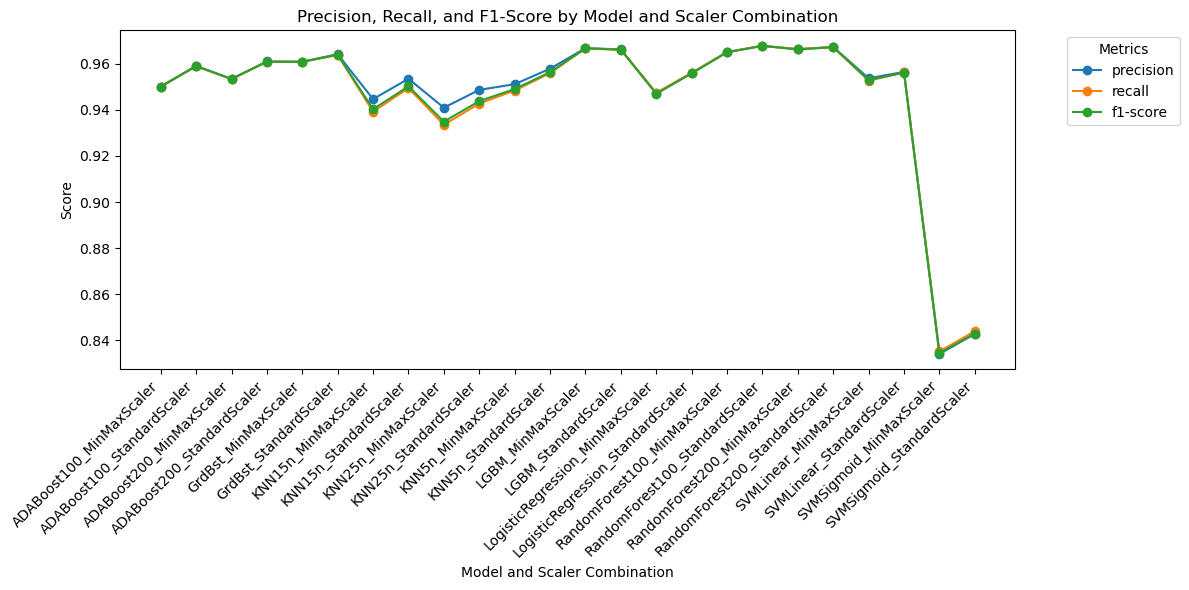

In [297]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot lines for precision, recall, and f1-score
for metric in ['precision', 'recall', 'f1-score']:
    ax.plot(mean_pp2['combination'], mean_pp2[metric], marker='o', label=metric)

# Add labels and title
ax.set_xlabel('Model and Scaler Combination')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score by Model and Scaler Combination')
ax.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1, stratify = y)

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Unique model and scaler combinations
combinations = mean_df.groupby(['model_name', 'scaler'])

# Plot lines for each combination
for (model_name, scaler), group in combinations:
    ax.plot(group['scaler'], group['precision'], marker='o', label=f'{model_name} - Precision')
    ax.plot(group['scaler'], group['recall'], marker='o', label=f'{model_name} - Recall')
    ax.plot(group['scaler'], group['f1-score'], marker='o', label=f'{model_name} - F1-Score')

# Add labels and title
ax.set_xlabel('Scaler')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score by Model and Scaler')
ax.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [282]:
def dfc(df):
    
    split_columns = df['model'].str.split('_', expand=True)

    split_columns.columns = ['model_name', 'scaler', 'split_method', 'n_components', 'random_state']

    df2 = df.join(split_columns)

    # Optionally, drop the original 'model' column
    df2.drop(columns=['model'], inplace=True)
    
    return df2

In [263]:
split_columns = p_result_df['model'].str.split('_', expand=True)

split_columns.columns = ['model_name', 'scaler', 'split_method', 'random_state']

p_res_df = p_result_df.join(split_columns)

# Optionally, drop the original 'model' column
p_res_df.drop(columns=['model'], inplace=True)

ValueError: Length mismatch: Expected axis has 6 elements, new values have 4 elements

In [159]:
acc2.sort_values(by='accuracy', ascending=False)

,accuracy,model_name,scaler,split_method,random_state
8,0.981643,RandomForest200,StandardScaler,tt,410
19,0.980676,LGBM,StandardScaler,tt,52
22,0.979710,LGBM,StandardScaler,sss,52
3,0.976812,RandomForest100,StandardScaler,sss,2
21,0.976812,LGBM,StandardScaler,sss,2
6,0.975845,RandomForest200,StandardScaler,tt,2
9,0.975845,RandomForest200,StandardScaler,sss,2
1,0.975845,RandomForest100,StandardScaler,tt,52
0,0.974879,RandomForest100,StandardScaler,tt,2
11,0.974879,RandomForest200,StandardScaler,sss,410


In [317]:

'lda_svd'[:3]

'lda'

In [323]:
from sklearn.model_selection import StratifiedShuffleSplit, KFold

In [165]:
k1, k2 = sc_pca_class_test(X, y, StandardScaler(), 'svd', 25, 0.2, RandomForestClassifier(n_estimators=175), 'tt', 25)

In [303]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
def sc_pca_class_test(X, y, scaler, reduce, components, ts, classifier, split_method, rs):

    X_scaled = scaler.fit_transform(X)
        
    r_params = {'n_components': components, 'random_state': rs}
    
    r_dc = {'pca': PCA(**r_params),
            'svd' : TruncatedSVD(**r_params),
            'tsne': TSNE(**r_params),
            'lda_svd' : LDA(solver= 'svd'),
            'lda_eigen' : LDA(solver='eigen'),
            'lda_lsqr' : LDA(solver='lsqr')}
    
    if reduce in r_dc.keys():
        if reduce[:3].lower() == 'lda':
            X_reduced = r_dc[reduce].fit_transform(X_scaled, y)
        else:
            X_reduced = r_dc[reduce].fit_transform(X_scaled)
    else: 
        X_reduced = X_scaled.copy()   
        
    n_splits=int((1/ts))
    
    split_dc = {
           'skf' : StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=rs),
            'sss' : StratifiedShuffleSplit(n_splits=n_splits, test_size=ts, random_state=rs),    
            'kf': KFold(n_splits=n_splits, shuffle=True, random_state=rs)
    }
    

    if split_method == 'tt':

        X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=ts, random_state=rs)
        
    elif split_method in split_dc.keys():
        
        for train_index, test_index in split_dc[split_method].split(X_reduced, y):
            X_train, X_test = X_reduced[train_index], X_reduced[test_index]
            y_train, y_test = y[train_index], y[test_index]
        
    else:
        print(split_method + ' not allowed')
        return 'FAILURE'
    
    classifier.fit(X_train, y_train)    
    
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report_dc = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dc).transpose()
    
    return accuracy, report_df

In [324]:
bac, brep = sc_pca_class_test(X, y, StandardScaler(), 'lda_svd', 5, 0.2, RandomForestClassifier(), 'tt', 42)

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

In [325]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score

# Fetch data (we use newsgroups data for demonstration; replace with actual email spam dataset)
newsgroups = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'soc.religion.christian'])
X = newsgroups.data
y = newsgroups.target


In [331]:
print(str(len(X)))
len(y)

1796


1796

In [335]:
y

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [326]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)


In [327]:
# Create LDA model using SVD solver
lda_svd = LinearDiscriminantAnalysis(solver='svd')
lda_svd.fit(X_train.toarray(), y_train)

# Make predictions and evaluate
y_pred_svd = lda_svd.predict(X_test.toarray())
print("SVD Solver")
print("Accuracy:", accuracy_score(y_test, y_pred_svd))
print(classification_report(y_test, y_pred_svd))


SVD Solver
Accuracy: 0.8831168831168831
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       235
           1       0.88      0.92      0.90       304

    accuracy                           0.88       539
   macro avg       0.88      0.88      0.88       539
weighted avg       0.88      0.88      0.88       539



In [336]:
# Create LDA model using Eigen solver
lda_eigen = LinearDiscriminantAnalysis(solver='eigen')
lda_eigen.fit(X_train.toarray(), y_train)

# Make predictions and evaluate
y_pred_eigen = lda_eigen.predict(X_test.toarray())
print("Eigen Solver")
print("Accuracy:", accuracy_score(y_test, y_pred_eigen))
print(classification_report(y_test, y_pred_eigen))


LinAlgError: The leading minor of order 12 of B is not positive definite. The factorization of B could not be completed and no eigenvalues or eigenvectors were computed.

In [337]:
# Create LDA model using LSQR solver
lda_lsqr = LinearDiscriminantAnalysis(solver='lsqr')
lda_lsqr.fit(X_train.toarray(), y_train)

# Make predictions and evaluate
y_pred_lsqr = lda_lsqr.predict(X_test.toarray())
print("LSQR Solver")
print("Accuracy:", accuracy_score(y_test, y_pred_lsqr))
print(classification_report(y_test, y_pred_lsqr))


LSQR Solver
Accuracy: 0.5139146567717996
              precision    recall  f1-score   support

           0       0.45      0.49      0.47       235
           1       0.57      0.53      0.55       304

    accuracy                           0.51       539
   macro avg       0.51      0.51      0.51       539
weighted avg       0.52      0.51      0.52       539



In [48]:
c1, c2 = sc_pca_class_test(X, y, mm_sc, 50, 0.2, LogisticRegression(), 'skf', 42)

scale
pca


In [49]:
c2

,precision,recall,f1-score,support
0,0.962060,0.967302,0.964674,734.00000
1,0.918919,0.906667,0.912752,300.00000
accuracy,0.949710,0.949710,0.949710,0.94971
macro avg,0.940489,0.936985,0.938713,1034.00000
weighted avg,0.949543,0.949710,0.949609,1034.00000


In [37]:
c1

0.9497098646034816

In [26]:
print(int((1/0.2)))

5


In [17]:
y = df['Prediction']
X = df.drop(columns=['Prediction'])


mm_sc = MinMaxScaler()
sc_sc = StandardScaler()


In [19]:
# Standardize the data
X_scaled = mm_sc.fit_transform(X)

# Apply PCA
pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_scaled)

In [21]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [22]:
for train_index, test_index in sss.split(X_pca, y):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [23]:
classifier = LogisticRegression()

In [24]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [25]:
print(accuracy)

0.9333333333333333


In [ ]:
        
        sss = StratifiedShuffleSplit(n_splits=int((1/ts)), test_size=ts, random_state=rs)
        
        for train_index, test_index in sss.split(X_pca, y):
            X_train, X_test = X_pca[train_index], X_pca[test_index]
            y_train, y_test = y[train_index], y[test_index]

In [ ]:
a_test, rep_test = sc_pca_class_test(X, y, mm_sc, 0.2, 25, LogisticRegression(), 'sss', 20)

In [ ]:
a_test

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

sc_dc = {'StandardScaler' : StandardScaler(), 'MinMaxScaler' : MinMaxScaler()}

sp_ls = ['tt', 'skf', 'sss']

pca_comp = [25, 50, 75, 100]

SV_lin = SVC(kernel='linear')
SV_log = SVC(kernel='sigmoid')

classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'RandomForest100': RandomForestClassifier(n_estimators=100),
    'RandomForest200': RandomForestClassifier(n_estimators=200),
    'SVMLinear': SV_lin,
    'SVMSigmoid': SV_log,
    'KNN5n' : KNeighborsClassifier(n_neighbors=5),
    'KNN15n' : KNeighborsClassifier(n_neighbors=15),
    'KNN25n' : KNeighborsClassifier(n_neighbors=25),    
    'LGBM' : lgb.LGBMClassifier(),
    'GrdBst': GradientBoostingClassifier(),
    'ADABoost100': AdaBoostClassifier(n_estimators=100),
    'ADABoost200': AdaBoostClassifier(n_estimators=200),    
}

pca_results_acc = {}
pca_results_rep = {}

for cl_name, cl_func in classifiers.items():
    for sc_name, sc_func in sc_dc.items():
        for sp in sp_ls:
            for n_comp in pca_comp:
                for rs in [25, 105, 94]:
                    acc, rep = sc_pca_class_test(X, y, sc_func, n_comp, 0.2, cl_func, sp, rs) 
                    key_name = cl_name + '_' + sc_name + '_' + sp + '_' + str(n_comp) + '_' + str(rs)
                    pca_results_acc[key_name] = acc
                    pca_results_rep[key_name] = rep

[LightGBM] [Info] Number of positive: 1199, number of negative: 2938
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001616 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289824 -> initscore=-0.896241
[LightGBM] [Info] Start training from score -0.896241
[LightGBM] [Info] Number of positive: 1196, number of negative: 2941
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289098 -> initscore=-0.899767
[LightGBM] [Info] Start training from score -0.899767
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 1200, number of negative: 2938
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 4138, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289995 -> initscore=-0.895408
[LightGBM] [Info] Start training from score -0.895408
[LightGBM] [Info] Number of positive: 1200, number of negative: 2938
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19125
[LightGBM] [Info] Number of data points in the train set: 4138, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289995 -> initscore=-0.895408
[LightGBM] [Info] Start training from score -0.895408
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 1200, number of negative: 2937
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290065 -> initscore=-0.895067
[LightGBM] [Info] Start training from score -0.895067
[LightGBM] [Info] Number of positive: 1200, number of negative: 2937
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290065 -> initscore=-0.895067
[LightGBM] [Info] Start training from score -0.895067
[LightGBM] [In

[LightGBM] [Info] Number of positive: 1200, number of negative: 2938
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 4138, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289995 -> initscore=-0.895408
[LightGBM] [Info] Start training from score -0.895408
[LightGBM] [Info] Number of positive: 1200, number of negative: 2938
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 4138, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289995 -> initscore=-0.895408
[LightGBM] [Info] Start training from score -0.895408
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 1200, number of negative: 2937
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002006 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19125
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290065 -> initscore=-0.895067
[LightGBM] [Info] Start training from score -0.895067
[LightGBM] [Info] Number of positive: 1200, number of negative: 2937
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290065 -> initscore=-0.895067
[LightGBM] [Info] Start training from score -0.895067
[LightGBM] [Inf

In [153]:
top_classifiers = {key:value for (key,value) in classifiers.items() if key in ['RandomForest200', 'RandomForest100','LGBM','GrdBost','AdaBoost200','SVMLinear']}
sp_ls_2 = ['tt', 'sss']

In [154]:
n_results_acc = {}
n_results_rep = {}

for cl_name, cl_func in top_classifiers.items():
    for sp in sp_ls_2:
        for rs in [2, 52, 410]:
            acc, rep = sc_pca_class_test(X, y, StandardScaler(), False, 0.2, cl_func, sp, rs) 
            key_name = cl_name + '_' + 'StandardScaler' + '_' + sp + '_' + str(rs)
            n_results_acc[key_name] = acc
            n_results_rep[key_name] = rep

[LightGBM] [Info] Number of positive: 1205, number of negative: 2932
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23809
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2610
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.291274 -> initscore=-0.889205
[LightGBM] [Info] Start training from score -0.889205
[LightGBM] [Info] Number of positive: 1213, number of negative: 2924
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23679
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2585
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.293208 -> initscore=-0.879856
[LightGBM] [Info] Start training from score -0.879856
[LightGBM] [

In [155]:
acc = pd.DataFrame.from_dict(n_results_acc, orient='index')
acc.reset_index(inplace=True)
acc.rename(columns={'index': 'model', 0 : 'accuracy'}, inplace=True)



In [158]:
split_columns = acc['model'].str.split('_', expand=True)

split_columns.columns = ['model_name', 'scaler', 'split_method', 'random_state']

acc2 = acc.join(split_columns)

# Optionally, drop the original 'model' column
acc2.drop(columns=['model'], inplace=True)

In [159]:
acc2.sort_values(by='accuracy', ascending=False)

,accuracy,model_name,scaler,split_method,random_state
8,0.981643,RandomForest200,StandardScaler,tt,410
19,0.980676,LGBM,StandardScaler,tt,52
22,0.979710,LGBM,StandardScaler,sss,52
3,0.976812,RandomForest100,StandardScaler,sss,2
21,0.976812,LGBM,StandardScaler,sss,2
6,0.975845,RandomForest200,StandardScaler,tt,2
9,0.975845,RandomForest200,StandardScaler,sss,2
1,0.975845,RandomForest100,StandardScaler,tt,52
0,0.974879,RandomForest100,StandardScaler,tt,2
11,0.974879,RandomForest200,StandardScaler,sss,410


In [ ]:
, StandardScaler(), tt or sss, pca=False

In [54]:
pca_results_acc

{'LogisticRegression_StandardScaler_tt_25_25': 0.9497584541062802,
 'LogisticRegression_StandardScaler_tt_25_105': 0.9478260869565217,
 'LogisticRegression_StandardScaler_tt_25_94': 0.9304347826086956,
 'LogisticRegression_StandardScaler_tt_50_25': 0.9642512077294686,
 'LogisticRegression_StandardScaler_tt_50_105': 0.9632850241545894,
 'LogisticRegression_StandardScaler_tt_50_94': 0.9603864734299516,
 'LogisticRegression_StandardScaler_tt_75_25': 0.9632850241545894,
 'LogisticRegression_StandardScaler_tt_75_105': 0.9671497584541063,
 'LogisticRegression_StandardScaler_tt_75_94': 0.9584541062801932,
 'LogisticRegression_StandardScaler_tt_100_25': 0.9594202898550724,
 'LogisticRegression_StandardScaler_tt_100_105': 0.9719806763285024,
 'LogisticRegression_StandardScaler_tt_100_94': 0.9632850241545894,
 'LogisticRegression_StandardScaler_skf_25_25': 0.9429400386847195,
 'LogisticRegression_StandardScaler_skf_25_105': 0.9487427466150871,
 'LogisticRegression_StandardScaler_skf_25_94': 0.94

In [85]:
acc_df = pd.DataFrame.from_dict(pca_results_acc, orient='index')
acc_df.reset_index(inplace=True)
acc_df.rename(columns={'index': 'model', 0 : 'accuracy'}, inplace=True)

In [108]:
acc_df.sort_values(by='accuracy', ascending=False)

,model,accuracy,underscore_count
190,RandomForest_200_MinMaxScaler_tt_100_105,0.978744,5
103,RandomForest_100_StandardScaler_sss_75_105,0.978744,5
187,RandomForest_200_MinMaxScaler_tt_75_105,0.977778,5
118,RandomForest_100_MinMaxScaler_tt_100_105,0.976812,5
621,LGBM_MinMaxScaler_tt_100_25,0.975845,4
...,...,...,...
313,SVMSigmoid_StandardScaler_sss_25_105,0.813527,4
349,SVMSigmoid_MinMaxScaler_sss_25_105,0.813527,4
338,SVMSigmoid_MinMaxScaler_skf_25_94,0.813346,4
350,SVMSigmoid_MinMaxScaler_sss_25_94,0.811594,4


In [ ]:
acc_df.model.str.contains()

In [265]:
# Count the number of underscores in the 'model' column
p_result_df['underscore_count'] = p_result_df['model'].str.count('_')

# Find rows with exactly six underscores (i.e., seven parts)
#acc_df = acc_df[acc_df['underscore_count'] == 6]

In [266]:
p_result_df.underscore_count.value_counts()

underscore_count
5    504
4    360
Name: count, dtype: int64

In [109]:
acc_5df = acc_df[acc_df['underscore_count'] == 5]
acc_5df_2 = acc_5df.copy()

In [110]:
acc_5df_2['model'] = acc_5df_2['model'].str.replace('_', '',1)

In [111]:
acc_5df_2

,model,accuracy,underscore_count
72,RandomForest100_StandardScaler_tt_25_25,0.968116,5
73,RandomForest100_StandardScaler_tt_25_105,0.970048,5
74,RandomForest100_StandardScaler_tt_25_94,0.964251,5
75,RandomForest100_StandardScaler_tt_50_25,0.969082,5
76,RandomForest100_StandardScaler_tt_50_105,0.970048,5
...,...,...,...
859,ADABoost200_MinMaxScaler_sss_75_105,0.956522,5
860,ADABoost200_MinMaxScaler_sss_75_94,0.947826,5
861,ADABoost200_MinMaxScaler_sss_100_25,0.952657,5
862,ADABoost200_MinMaxScaler_sss_100_105,0.954589,5


In [103]:
acc_5df_2['model'] = acc_5df_2['model'].apply(lambda x: x.replace('_', '', 1))

In [105]:
def remove_first_underscore(s):
    # Find the position of the first underscore
    pos = s.find('_')
    # If an underscore is found, replace it with an empty string
    if pos != -1:
        return s[:pos] + s[pos + 1:]
    return s

# Apply the function to the 'model' column
acc_5df_2['model'] = acc_5df_2['model'].apply(remove_first_underscore)

In [107]:
acc_5df_2.model

72      RandomForest100StandardScalertt_25_25
73     RandomForest100StandardScalertt_25_105
74      RandomForest100StandardScalertt_25_94
75      RandomForest100StandardScalertt_50_25
76     RandomForest100StandardScalertt_50_105
                        ...                  
859         ADABoost200MinMaxScalersss_75_105
860          ADABoost200MinMaxScalersss_75_94
861         ADABoost200MinMaxScalersss_100_25
862        ADABoost200MinMaxScalersss_100_105
863         ADABoost200MinMaxScalersss_100_94
Name: model, Length: 504, dtype: object

In [112]:
acc_5df_2['underscore_count'] = acc_5df_2['model'].str.count('_')
acc_5df_2.underscore_count.value_counts()

underscore_count
4    504
Name: count, dtype: int64

In [113]:
acc_df2 = pd.concat([acc_df[acc_df['underscore_count'] == 4],acc_5df_2])

In [ ]:
acc_df2

In [76]:
top_models = acc_df[acc_df.accuracy > 0.97]

In [79]:
top_models

,model,accuracy
10,LogisticRegression_StandardScaler_tt_100_105,0.971981
30,LogisticRegression_StandardScaler_sss_75_25,0.971014
33,LogisticRegression_StandardScaler_sss_100_25,0.970048
73,RandomForest_100_StandardScaler_tt_25_105,0.970048
76,RandomForest_100_StandardScaler_tt_50_105,0.970048
...,...,...
647,LGBM_MinMaxScaler_sss_100_94,0.971014
654,GrdBst_StandardScaler_tt_75_25,0.972947
657,GrdBst_StandardScaler_tt_100_25,0.971981
799,ADABoost_200_StandardScaler_tt_75_105,0.970048


In [119]:
split_columns = acc_df2['model'].str.split('_', expand=True)

# Rename the new columns
split_columns.columns = ['model_name', 'scaler', 'split_method', 'pca_components', 'random_state']

# Join the new columns back to the original DataFrame
acc_df3 = acc_df2.join(split_columns)

# Optionally, drop the original 'model' column
acc_df3.drop(columns=['model', 'underscore_count'], inplace=True)

In [130]:
acc_df3.sort_values(by='accuracy', ascending=False)

,accuracy,model_name,scaler,split_method,pca_components,random_state
190,0.978744,RandomForest200,MinMaxScaler,tt,100,105
103,0.978744,RandomForest100,StandardScaler,sss,75,105
187,0.977778,RandomForest200,MinMaxScaler,tt,75,105
118,0.976812,RandomForest100,MinMaxScaler,tt,100,105
636,0.975845,LGBM,MinMaxScaler,sss,25,25
...,...,...,...,...,...,...
349,0.813527,SVMSigmoid,MinMaxScaler,sss,25,105
313,0.813527,SVMSigmoid,StandardScaler,sss,25,105
338,0.813346,SVMSigmoid,MinMaxScaler,skf,25,94
350,0.811594,SVMSigmoid,MinMaxScaler,sss,25,94


In [121]:
acc_df3 = acc_df3.sort_values(by='accuracy', ascending=False)

In [136]:
top_models = acc_df3[acc_df3.accuracy > 0.97]
len(top_models)

68

In [142]:
top_mods = acc_df3[acc_df3.model_name.isin(['RandomForest200', 'RandomForest100','LGBM','GrdBost','AdaBoost200','SVMLinear'])]

In [143]:
for mod in top_mods.model_name.unique():
    print(mod + ': ' + str(round(top_mods[top_mods.model_name == mod]['accuracy'].mean(), 4)))

print('\n')
for mod in top_mods.scaler.unique():
    print(mod + ': ' + str(round(top_mods[top_mods.scaler == mod]['accuracy'].mean(), 4)))   
    
print('\n')
for mod in top_mods.split_method.unique():
    print(mod + ': ' + str(round(top_mods[top_mods.split_method == mod]['accuracy'].mean(), 4))) 
    
print('\n')
for mod in top_mods.pca_components.unique():
    print(mod + ': ' + str(round(top_mods[top_mods.pca_components == mod]['accuracy'].mean(), 4)))     
    

RandomForest200: 0.9667
RandomForest100: 0.9664
LGBM: 0.9663
SVMLinear: 0.9544


MinMaxScaler: 0.9627
StandardScaler: 0.9643


tt: 0.9653
sss: 0.9647
skf: 0.9605


100: 0.9652
75: 0.9642
25: 0.9604
50: 0.9641


In [ ]:
'tt', 

In [139]:
for mod in top_models.model_name.unique():
    print(mod + ': ' + str(round(top_models[top_models.model_name == mod]['accuracy'].mean(), 4)))

print('\n')
for mod in top_models.scaler.unique():
    print(mod + ': ' + str(round(top_models[top_models.scaler == mod]['accuracy'].mean(), 4)))   
    
print('\n')
for mod in top_models.split_method.unique():
    print(mod + ': ' + str(round(top_models[top_models.split_method == mod]['accuracy'].mean(), 4))) 
    
print('\n')
for mod in top_models.pca_components.unique():
    print(mod + ': ' + str(round(top_models[top_models.pca_components == mod]['accuracy'].mean(), 4)))     
    

RandomForest200: 0.972
RandomForest100: 0.9718
LGBM: 0.9721
GrdBst: 0.9725
LogisticRegression: 0.971
ADABoost200: 0.971
SVMLinear: 0.9705


MinMaxScaler: 0.9723
StandardScaler: 0.9715


tt: 0.9724
sss: 0.9718
skf: 0.9707


100: 0.9721
75: 0.9723
25: 0.9709
50: 0.9717


In [ ]:
c1, c2 = sc_pca_class_test(X, y, mm_sc, 50, 0.2, LogisticRegression(), 'skf', 42)

In [53]:


results_acc = {}
results_rep = {}

for classifier, func in classifiers.items():
    for sc_name, sc_func in sc_dc.items(): 
        results[classifier] = 
    

Logistic Regression
Random Forest
SVM Linear
SVM Sigmoid
KNN
LGBM
GrdBst


In [45]:
SV_log = SVC(kernel='sigmoid')

In [37]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')

In [46]:
svm_acc, svm_class = sc_pca_class(X, y, mm_sc, 50, 0.2, SV_log, 12)

In [47]:
svm_acc

0.8521739130434782

In [35]:
log_acc_50, log_class = sc_pca_class(X, y, mm_sc, 50, 0.2, LogisticRegression(), 12)

In [ ]:
def sc_pca_class(X, y, scaler, n_comp, ts, classifier, split_method)

    X_scaled = scaler.fit_transform(X)
    
    if split_method == 'train_test':

        X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
        
        # Train and evaluate the classifier
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        
    elif split_method == 'stratified_kfold':
        # Split data using StratifiedKFold
        n_splits = kwargs.get('n_splits', 5)  # Default to 5 splits
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        
        accuracies = []
        reports = []

        for train_index, test_index in skf.split(X_pca, y):
            X_train, X_test = X_pca[train_index], X_pca[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)
            accuracies.append(accuracy_score(y_test, y_pred))
            reports.append(classification_report(y_test, y_pred, output_dict=True))
        
        accuracy = np.mean(accuracies)
        report = reports  # List of classification reports for each fold
        
    elif split_method == 'stratified_shuffle_split':
        # Split data using StratifiedShuffleSplit
        test_size = kwargs.get('test_size', 0.2)  # Default test size
        sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)
        
        for train_index, test_index in sss.split(X_pca, y):
            X_train, X_test = X_pca[train_index], X_pca[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred)
        
    else:
        raise ValueError("Unsupported split_method. Choose from 'train_test', 'stratified_kfold', or 'stratified_shuffle_split'.")
    
    classifier.fit(X_train, y_train)    
    
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, classification_report(y_test, y_pred)

In [32]:
def sc_pca_class(X, y, scaler, components, ts, classifier, split_method):

    X_scaled = scaler.fit_transform(X)
    
    pca = PCA(n_components=components)
    X_pca = pca.fit_transform(X_scaled)
    
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=ts, random_state=42)

    classifier.fit(X_train, y_train)    
    
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, classification_report(y_test, y_pred)

In [22]:
from sklearn.metrics import accuracy_score, classification_report

# pca = 25

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9729468599033816
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       739
           1       0.95      0.96      0.95       296

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



In [25]:
# pca = 5


y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9429951690821256
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       739
           1       0.89      0.91      0.90       296

    accuracy                           0.94      1035
   macro avg       0.93      0.93      0.93      1035
weighted avg       0.94      0.94      0.94      1035



In [186]:
from lightgbm import LGBMClassifier
LGBMClassifier()

LGBMClassifier()

In [188]:
classes = {'RandomForest100': RandomForestClassifier(n_estimators=100),
'RandomForest150': RandomForestClassifier(n_estimators=150),         
 'RandomForest200': RandomForestClassifier(n_estimators=200),
 'LGBM': LGBMClassifier()}

test_df_1 = create_acc_df(classes, ['tt', 'sss'], ['pca', 'svd', 'None'], [15, 25, 35])
test_df_1

[LightGBM] [Info] Number of positive: 1199, number of negative: 2938
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289824 -> initscore=-0.896241
[LightGBM] [Info] Start training from score -0.896241
[LightGBM] [Info] Number of positive: 1187, number of negative: 2950
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.286923 -> initscore=-0.910376
[LightGBM] [Info] Start training from score -0.910376
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 1200, number of negative: 2937
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290065 -> initscore=-0.895067
[LightGBM] [Info] Start training from score -0.895067
[LightGBM] [Info] Number of positive: 1199, number of negative: 2938
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289824 -> initscore=-0.896241
[LightGBM] [Info] Start training from score -0.896241
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 1200, number of negative: 2937
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000930 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290065 -> initscore=-0.895067
[LightGBM] [Info] Start training from score -0.895067
[LightGBM] [Info] Number of positive: 1200, number of negative: 2937
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290065 -> initscore=-0.895067
[LightGBM] [Info] Start training from score -0.895067
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 1200, number of negative: 2937
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23574
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2584
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290065 -> initscore=-0.895067
[LightGBM] [Info] Start training from score -0.895067
[LightGBM] [Info] Number of positive: 1200, number of negative: 2937
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23603
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2577
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290065 -> initscore=-0.895067
[LightGBM] [Info] Start training from score -0.895067
[LightGBM] [

,accuracy,model_name,split_method,pca,n_components,random_state
36,0.983575,RandomForest100,tt,None,15,25
150,0.983575,RandomForest200,tt,None,35,25
202,0.982609,LGBM,tt,None,25,9
201,0.982609,LGBM,tt,None,25,25
206,0.982609,LGBM,tt,None,35,210
...,...,...,...,...,...,...
29,0.940097,RandomForest100,sss,svd,15,210
119,0.940097,RandomForest200,sss,pca,15,210
65,0.939130,RandomForest150,sss,pca,15,210
191,0.939130,LGBM,sss,svd,15,210


In [194]:
for c in test_df_1.pca.unique():
    print(str(c) + ': ' + str(test_df_1[test_df_1.pca == c]['accuracy'].mean()))

print('\n')
    
for c in test_df_1.model_name.unique():
    print(str(c) + ': ' + str(test_df_1[test_df_1.model_name == c]['accuracy'].mean()))    

None: 0.9750939345142243
pca: 0.9630703166935051
svd: 0.9629495437466452


RandomForest100: 0.9661120057255322
RandomForest200: 0.9673286813383434
LGBM: 0.968795848989086
RandomForest150: 0.9659151905528719


In [198]:
classes_2 = {'RandomForest200': RandomForestClassifier(n_estimators=200),
'RandomForest250': RandomForestClassifier(n_estimators=250),         
 'RandomForest300': RandomForestClassifier(n_estimators=300),
 'LGBM': LGBMClassifier()}

test_df_2 = create_acc_df(classes_2, ['tt'], [None], [0], [94, 73, 35])
test_df_2

[LightGBM] [Info] Number of positive: 1199, number of negative: 2938
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019966 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23327
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2558
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289824 -> initscore=-0.896241
[LightGBM] [Info] Start training from score -0.896241
[LightGBM] [Info] Number of positive: 1185, number of negative: 2952
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23207
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2540
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.286439 -> initscore=-0.912740
[LightGBM] [Info] Start training from score -0.912740
[LightGBM] [

,accuracy,model_name,split_method,pca,n_components,random_state
11,0.982609,LGBM,tt,None,0,35
6,0.979710,RandomForest300,tt,None,0,94
8,0.979710,RandomForest300,tt,None,0,35
0,0.978744,RandomForest200,tt,None,0,94
9,0.977778,LGBM,tt,None,0,94
2,0.976812,RandomForest200,tt,None,0,35
7,0.976812,RandomForest300,tt,None,0,73
3,0.975845,RandomForest250,tt,None,0,94
4,0.974879,RandomForest250,tt,None,0,73
5,0.974879,RandomForest250,tt,None,0,35


In [199]:
for c in test_df_2.model_name.unique():
    print(str(c) + ': ' + str(test_df_2[test_df_2.model_name == c]['accuracy'].mean()))    

LGBM: 0.9780998389694041
RandomForest300: 0.9787439613526571
RandomForest200: 0.9758454106280192
RandomForest250: 0.9752012882447666


In [200]:
classes_3 = {'RandomForest300': RandomForestClassifier(n_estimators=300),
'RandomForest350': RandomForestClassifier(n_estimators=350),         
 'RandomForest400': RandomForestClassifier(n_estimators=400),
 'LGBM': LGBMClassifier()}

test_df_3 = create_acc_df(classes_3, ['tt'], [None], [0], [194, 290, 20, 100, 2, 53, 21])
test_df_3

[LightGBM] [Info] Number of positive: 1190, number of negative: 2947
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23419
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2559
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.287648 -> initscore=-0.906834
[LightGBM] [Info] Start training from score -0.906834
[LightGBM] [Info] Number of positive: 1201, number of negative: 2936
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23742
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2584
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290307 -> initscore=-0.893894
[LightGBM] [Info] Start training from score -0.893894
[LightGBM] [

,accuracy,model_name,split_method,pca,n_components,random_state
27,0.984541,LGBM,tt,None,0,21
22,0.984541,LGBM,tt,None,0,290
21,0.984541,LGBM,tt,None,0,194
8,0.983575,RandomForest350,tt,None,0,290
1,0.983575,RandomForest300,tt,None,0,290
7,0.982609,RandomForest350,tt,None,0,194
15,0.982609,RandomForest400,tt,None,0,290
13,0.981643,RandomForest350,tt,None,0,21
23,0.981643,LGBM,tt,None,0,20
6,0.981643,RandomForest300,tt,None,0,21


In [208]:
from sklearn.model_selection import RandomizedSearchCV

def lgbm_rand_seach(X, y, params):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lgbm = lgb.LGBMClassifier()
    
    param_dist = params
    
    random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
    )

    # Fit RandomizedSearchCV
    random_search.fit(X_train, y_train)

    # Best parameters and score
    print("Best parameters found: ", random_search.best_params_)
    print("Best score: ", random_search.best_score_)

    # Predict and evaluate on the test set
    best_model = random_search.best_estimator_
    test_score = best_model.score(X_test, y_test)
    print("Test set score: ", test_score)

In [205]:
'''    param_dist = {
        'num_leaves': [31, 50, 70],
        'max_depth': [-1, 10, 20, 30],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [20, 40, 60, 100],
        'min_child_samples': [5, 10, 20]
    }    
'''
lgbm_rand_seach(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 1204, number of negative: 2933
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21031
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2582
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.291032 -> initscore=-0.890376
[LightGBM] [Info] Start training from score -0.890376
Best parameters found:  {'num_leaves': 70, 'n_estimators': 60, 'min_child_samples': 20, 'max_depth': 20, 'learning_rate': 0.2}
Best score:  0.9758299306614328
Test set score:  0.978743961352657


In [209]:
param_1 = {
    'num_leaves': [50, 70, 90],
    'max_depth': [15, 20, 25, 35],
    'learning_rate': [0.225, 0.15, 0.175],
    'n_estimators': [80, 60, 100, 120],
    'min_child_samples': [10, 20, 30, 25]
}    

In [210]:
lgbm_rand_seach(X,y,param_1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 1204, number of negative: 2933
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21031
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2582
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.291032 -> initscore=-0.890376
[LightGBM] [Info] Start training from score -0.890376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [211]:
param_2 = {
    'num_leaves': [110, 70, 90],
    'max_depth': [30, 22, 25, 35],
    'learning_rate': [0.225, 0.25, 0.2],
    'n_estimators': [80, 150, 110, 120],
    'min_child_samples': [35, 20, 30, 25]
}    

In [212]:
lgbm_rand_seach(X,y,param_2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 1204, number of negative: 2933
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21031
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2582
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.291032 -> initscore=-0.890376
[LightGBM] [Info] Start training from score -0.890376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [213]:
param_3 = {
    'num_leaves': [80, 70, 90],
    'max_depth': [22, 25, 28],
    'learning_rate': [0.225, 0.25, 0.2],
    'n_estimators': [100, 130, 110, 120],
    'min_child_samples': [15, 20, 25]
}    

In [214]:
lgbm_rand_seach(X,y,param_3)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 1204, number of negative: 2933
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21820
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2808
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.291032 -> initscore=-0.890376
[LightGBM] [Info] Start training from score -0.890376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [215]:
param_4 = {
    'num_leaves': [80, 85, 90],
    'max_depth': [22, 25, 20],
    'learning_rate': [0.21, 0.19, 0.2],
    'n_estimators': [135, 130, 125],
    'min_child_samples': [15, 18, 12]
}    

In [216]:
lgbm_rand_seach(X,y,param_4)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 1204, number of negative: 2933
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21356
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2679
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.291032 -> initscore=-0.890376
[LightGBM] [Info] Start training from score -0.890376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [201]:
for c in test_df_3.model_name.unique():
    print(str(c) + ': ' + str(test_df_3[test_df_3.model_name == c]['accuracy'].mean()))    

LGBM: 0.9780538302277434
RandomForest350: 0.975983436853002
RandomForest300: 0.9758454106280192
RandomForest400: 0.9755693581780537
